In [1]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

In [2]:
# pandas options
pd.set_option("mode.copy_on_write", True)
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7

# Numpy options
np.set_printoptions(precision = 2, suppress=True)

In [3]:
billboard = pd.read_csv("billboard.csv")
billboard

,artist,track,date_entered,wk1,wk2,wk3,wk4,wk5,wk6,wk7,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2 Pac,Baby Don't Cry (Keep...,2000-02-26,87,82.00,72.00,77.00,87.00,94.00,99.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2Ge+her,The Hardest Part Of ...,2000-09-02,91,87.00,92.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3 Doors Down,Kryptonite,2000-04-08,81,70.00,68.00,67.00,66.00,57.00,54.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,Ying Yang Twins,Whistle While You Tw...,2000-03-18,95,94.00,91.00,85.00,84.00,78.00,74.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,Zombie Nation,Kernkraft 400,2000-09-02,99,99.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,matchbox twenty,Bent,2000-04-29,60,37.00,29.00,24.00,22.00,21.00,18.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. 총 몇 명의 가수(artist)가 차트에 있으며, 가수별로 몇 곡(track)이 차트에 들어있는지 알아보세요. (동명이인은 없다고 가정하고)
2. 곡명은 같지만, 가수가 다른 곡이 있는지 알아보고, 서로 다른 노래가 차트에 몇 개나 있는지 알아보세요.

살펴보았다면, 이후 grouping시 artist와 track을 함께 사용해야함을 이해했을 겁니다.

3. 이 데이터를 주(week)에 대해서 아래처럼 long format으로 바꿉니다.

- wk column에 wk1부터 missing이 없는 wk*까지 숫자로 표현되고,
- rank column에는 해당하는 week의 순위가 나타납니다.
- melt()를 이용하고,
- .str.replace()와 .astype("int64")를 사용해야 할 수 있습니다.
- .dropna(subset="rank", inplace=True)를 사용하여 rank column의 missing을 처리하세요.
- 결과를 billboard_long 변수에 할당하여 이후 문제를 이어가세요.
> 구하지 못한 경우, 정제된 다음 파일을 다운받아 사용하세요.

billboard_long




In [11]:
billboard_artist = billboard.iloc[:,:2]
billboard.groupby('artist')['track'].size()

artist
2 Pac              1
2Ge+her            1
3 Doors Down       2
                  ..
Ying Yang Twins    1
Zombie Nation      1
matchbox twenty    1
Name: track, Length: 228, dtype: int64

In [12]:
# 1. 총 몇 명의 가수(artist)가 차트에 있으며, 가수별로 몇 곡(track)이 차트에 들어있는지 알아보세요. (동명이인은 없다고 가정하고)
len(billboard_artist['artist'].unique())
len(billboard_artist)

317

In [13]:
billboard_artist[["artist"]].value_counts().reset_index(name="n")

,artist,n
0,Jay-Z,5
1,"Houston, Whitney",4
2,"Dixie Chicks, The",4
...,...,...
225,"Hollister, Dave",1
226,Hot Boys,1
227,matchbox twenty,1


In [14]:
# 2. 곡명은 같지만, 가수가 다른 곡이 있는지 알아보고, 서로 다른 노래가 차트에 몇 개나 있는지 알아보세요.

In [15]:
billboard_name= billboard_artist[["track"]].value_counts().reset_index(name="n")
billboard_name

,track,n
0,Where I Wanna Be,2
1,Original Prankster,1
2,Separated,1
...,...,...
313,He Loves U Not,1
314,He Can't Love U,1
315,www.memory,1


In [16]:
billboard_name.query('n>1')

,track,n
0,Where I Wanna Be,2


In [17]:
# 3

billboard_long = billboard.melt(
    id_vars=['artist', 'track', 'date_entered'],
    value_name='rank',
    var_name='wk'
)

billboard_long.dropna(subset=["rank"], inplace=True)
billboard_long['wk'] = billboard_long['wk'].str.replace('wk', '').astype(int)

billboard_long

,artist,track,date_entered,wk,rank
0,2 Pac,Baby Don't Cry (Keep...,2000-02-26,1,87.00
1,2Ge+her,The Hardest Part Of ...,2000-09-02,1,91.00
2,3 Doors Down,Kryptonite,2000-04-08,1,81.00
...,...,...,...,...,...
20033,Creed,Higher,1999-09-11,64,50.00
20150,Lonestar,Amazed,1999-06-05,64,50.00
20350,Creed,Higher,1999-09-11,65,49.00


4. 50주 이상(포함) 머무른 곡들을 구해보세요.
- 연속으로 머무를 필요없음; 차트에서 나갔다가 다시 들어오는 곡들이 있음
- 머문 기간을 .size()를 이용해 구한 후
- 오래 머무른 순서로 정렬 후
- query()를 이용해 50주 이상으로 필터링
- 결과가 artist와 track순으로 정렬되어 있는지 확인해 주세요!
- 코드는 다음 예처럼 하나로 연결하여 간결하게 구성해보세요.

```
#
(
   billboard_long.groupby(...)
   .size()
   ...
   .query(...)
)

```

이후 코드도 최대한 이처럼 간결하게 구성해보도록 하세요.

In [18]:
fifty = (
  billboard_long.groupby(['artist','track'])
  .size()
  .reset_index(name='count')
  .query("count>=50")
)
fifty

,artist,track,count
2,3 Doors Down,Kryptonite,53
62,Creed,Higher,57
121,"Hill, Faith",Breathe,53
179,Lonestar,Amazed,55



5. 4번에서 구한 곡들 각각에 대해서 주에 따라 순위가 어떻게 변화했는지 시각화를 통해 살펴보기 위해서
- 5.1 먼저, 위 곡들만을 포함하도록 4번의 데이터와 원래 데이터(billboard_long)를 merge()를 이용해 추린 후, 50주 이상 머문 곡으로 필터링하세요.
> 4번을 구하지 못한 경우, 다음 파일을 받아 이용하세요.
- 5.2 seaborn.objects를 이용해 대략 다음과 같이 주에 따른 순위의 변화를 그려보세요.

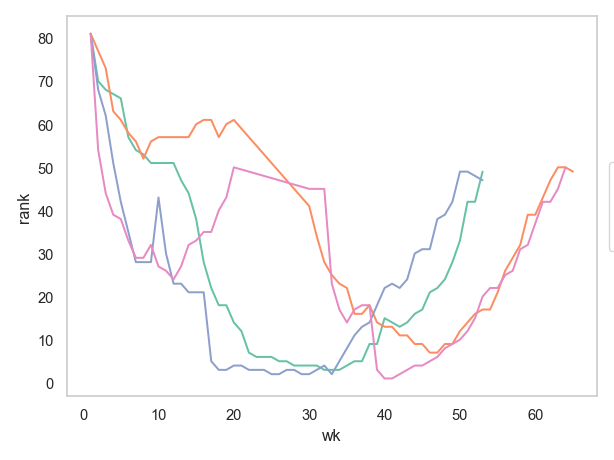

In [19]:
four = billboard_long.merge(fifty, how='right')
four

,artist,track,date_entered,wk,rank,count
0,3 Doors Down,Kryptonite,2000-04-08,1,81.00,53
1,3 Doors Down,Kryptonite,2000-04-08,2,70.00,53
2,3 Doors Down,Kryptonite,2000-04-08,3,68.00,53
...,...,...,...,...,...,...
215,Lonestar,Amazed,1999-06-05,62,42.00,55
216,Lonestar,Amazed,1999-06-05,63,45.00,55
217,Lonestar,Amazed,1999-06-05,64,50.00,55


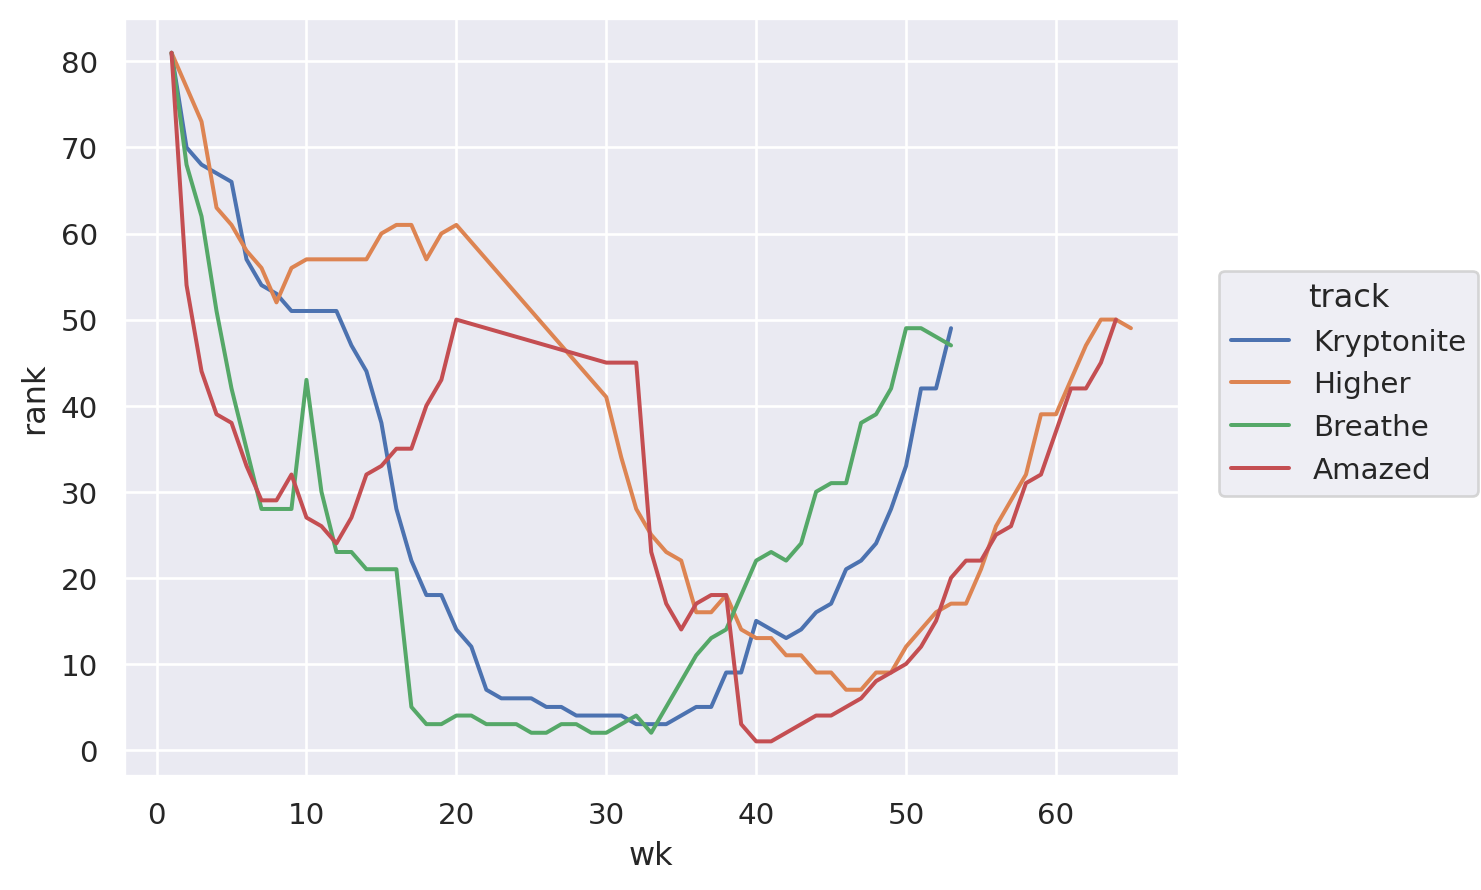

In [20]:
(
  so.Plot(four, "wk", "rank", color="track")
  .add(so.Line(), so.Agg())
)

6. (가수별) 곡별로 차트에 머문 기간(weeks)과 가장 높이 올라간 순위를 구해서, 높은 순위를 달성한 곡일수록 차트에 더 오래 머물었는지 알아봅니다.
- 6.1 곡별로 차트에 머문 기간을 DataFrame으로 구하고; .reset_index(name=" ") 이용
- 6.2 곡별로 최상위 순위를 min()을 이용해 DataFrame으로 구한 후
- 6.3 이 두 DataFrame을 merge()를 이용해 합친 후
- 6.4 seaborn.objects를 이용해 머문 기간에 따른 최상위 순위에 대한 관계를 아래와 같이 scatterplot으로 살펴보세요.
- 눈에 띄는 점을 간단히 기술해보세요.

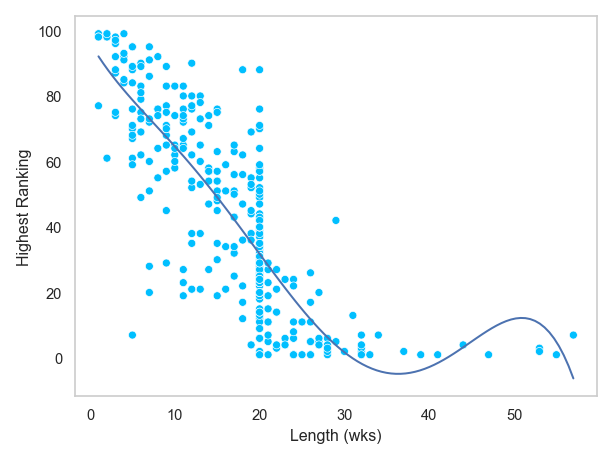

In [21]:
weeks_on_chart = (
    billboard_long.groupby(['artist', 'track'])
    .apply(lambda x: x['wk'].nunique())
    .reset_index(name='weeks_on_chart')
)


In [22]:
top_rank = (
    billboard_long.groupby(['artist', 'track'])
    .agg({'rank': 'min'})
    .reset_index()
)


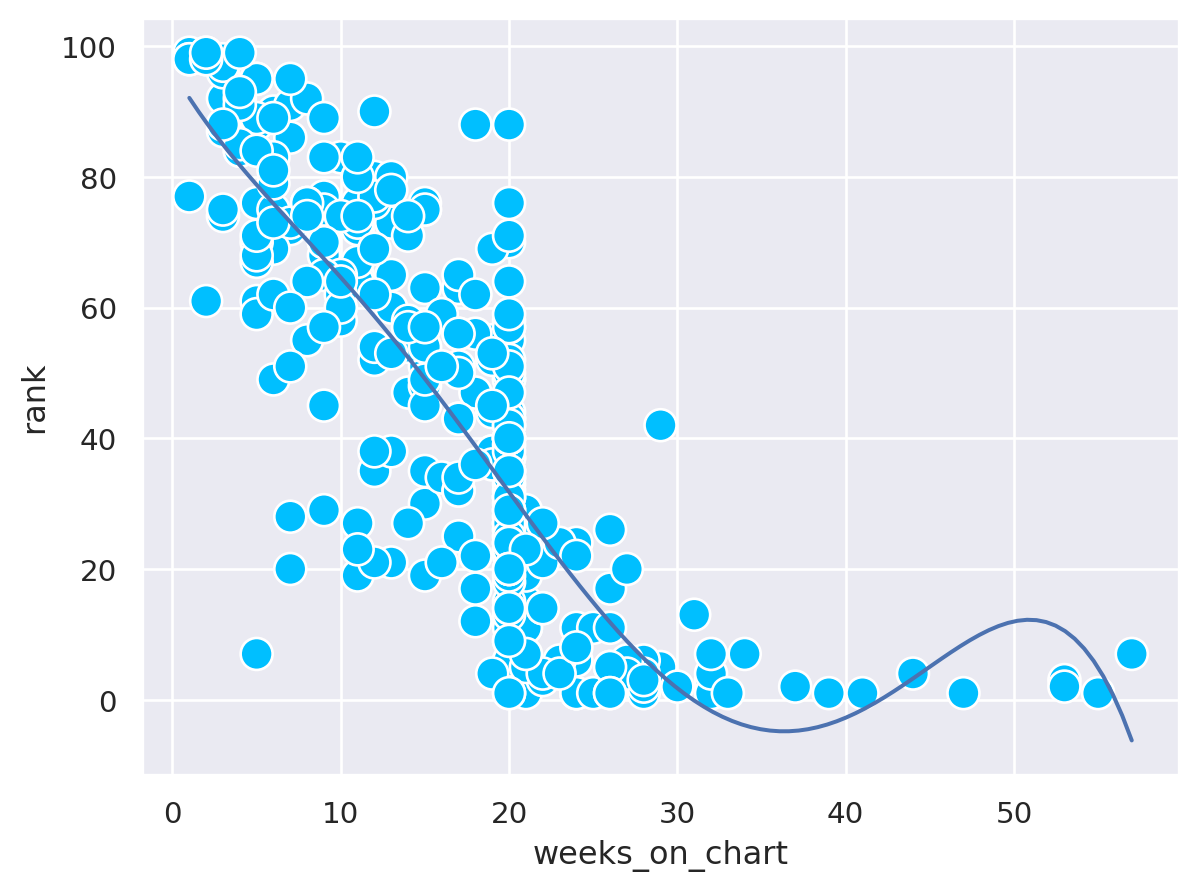

In [23]:
merged_df = pd.merge(weeks_on_chart, top_rank, on=['artist', 'track'])
import seaborn as sns
import matplotlib.pyplot as plt


p = (
    so.Plot(merged_df, x='weeks_on_chart', y='rank')
    .add(so.Dot(color="deepskyblue", pointsize=12, edgecolor="white", edgewidth=1)) 
    .add(so.Line(), so.PolyFit(5))
)
p

7. 순위 1위를 달성한 곡들에 한해, 차트에 진입시 순위와 1위에 처음 도달한 주(week)의 정보가 다음과 같이 표시되도록 구해보세요.
- 함수를 만들고; min()과 argmin()이 필요할 수 있음

- apply()로 그 함수를 적용하여 구해보세요.

In [24]:
billboard_long

,artist,track,date_entered,wk,rank
0,2 Pac,Baby Don't Cry (Keep...,2000-02-26,1,87.00
1,2Ge+her,The Hardest Part Of ...,2000-09-02,1,91.00
2,3 Doors Down,Kryptonite,2000-04-08,1,81.00
...,...,...,...,...,...
20033,Creed,Higher,1999-09-11,64,50.00
20150,Lonestar,Amazed,1999-06-05,64,50.00
20350,Creed,Higher,1999-09-11,65,49.00


In [25]:
import pandas as pd

# 데이터프레임 생성
df = billboard_long

# 1위를 달성한 곡들만으로 이루어진 데이터프레임 생성
top_songs = df[df['rank'] == 1]

# artist와 track을 기준으로 그룹화하여 최초 진입 주(week)를 찾음
grouped = top_songs.groupby(['artist', 'track']).agg({'wk': 'min', 'rank': 'first'})

# reset_index()를 이용하여 데이터프레임으로 변환
grouped = grouped.reset_index()

# 결과 출력
grouped


,artist,track,wk,rank
0,Aaliyah,Try Again,14,1.00
1,"Aguilera, Christina",Come On Over Baby (A...,11,1.00
2,"Aguilera, Christina",What A Girl Wants,8,1.00
...,...,...,...,...
14,Sisqo,Incomplete,8,1.00
15,Vertical Horizon,Everything You Want,26,1.00
16,matchbox twenty,Bent,13,1.00


In [26]:
df = billboard_long

# 1위를 달성한 곡들만으로 이루어진 데이터프레임 생성
top_songs = df[df['rank'] == 1]
pd.merge(df,top_songs,how='right')

,artist,track,date_entered,wk,rank
0,Madonna,Music,2000-08-12,6,1.00
1,Madonna,Music,2000-08-12,7,1.00
2,"Aguilera, Christina",What A Girl Wants,1999-11-27,8,1.00
...,...,...,...,...,...
52,Creed,With Arms Wide Open,2000-05-13,27,1.00
53,Lonestar,Amazed,1999-06-05,40,1.00
54,Lonestar,Amazed,1999-06-05,41,1.00


8. 빠르게 1위가 된 곡일 수록 빠르게 차트에서 사라졌을까를 알아보기 위해, 7번의 결과를 이용해 다음과 같이 변형해보세요.
- 7번을 구하지 못한 경우, 다음 파일을 받아 이용하세요.

- 즉, 차트 진입시의 순위 정보와, 1위가 된 week의 정보만을 취해, 그 비율(rate)를 구하면, 얼마나 빠르게 1위가 되었는지 알 수 있습니다.


```
# 코드로 형식 지정됨
#                 artist                    track  wk  rank   rate
# 0              Aaliyah                Try Again  14 59.00   4.21
# 1  Aguilera, Christina  Come On Over Baby (A...  11 57.00   5.18
# 2  Aguilera, Christina        What A Girl Wants   8 71.00   8.88
# 3        Carey, Mariah  Thank God I Found Yo...  11 82.00   7.45
# 4                Creed      With Arms Wide Open  27 84.00   3.11
# 5      Destiny's Child  Independent Women Pa...   9 78.00   8.67
# ...
```



- 마지막으로, seaborn.objects를 이용해 다음과 같이 시각화해보세요.

In [54]:
df = pd.read_csv("wk_rank.csv")
df2=(
df.groupby(['artist', 'track'])['wk','rank'].sum()
  .assign(rate= lambda x :( x['rank']-1) /( x['wk']-1))
)
df2['wk'] = df2['wk']-1
df2['rank'] = df2['rank']-1
df2

<ipython-input-54-0a504af6dd72>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['artist', 'track'])['wk','rank'].sum()


wk  rank  rate
artist              track                                  
Aaliyah             Try Again                14 59.00  4.21
Aguilera, Christina Come On Over Baby (A...  11 57.00  5.18
                    What A Girl Wants         8 71.00  8.88
...                                          ..   ...   ...
Sisqo               Incomplete                8 77.00  9.62
Vertical Horizon    Everything You Want      26 70.00  2.69
matchbox twenty     Bent                     13 60.00  4.62

[17 rows x 3 columns]

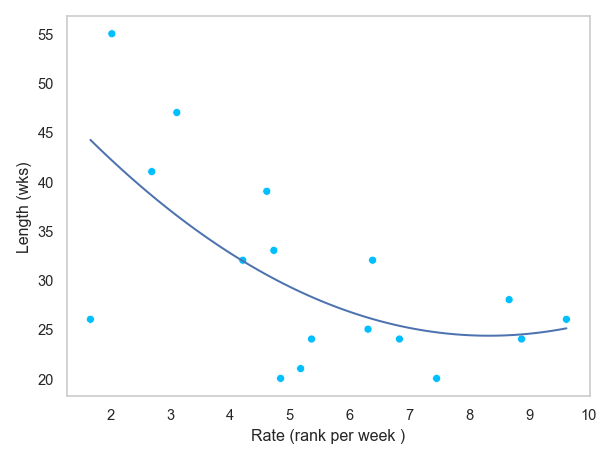

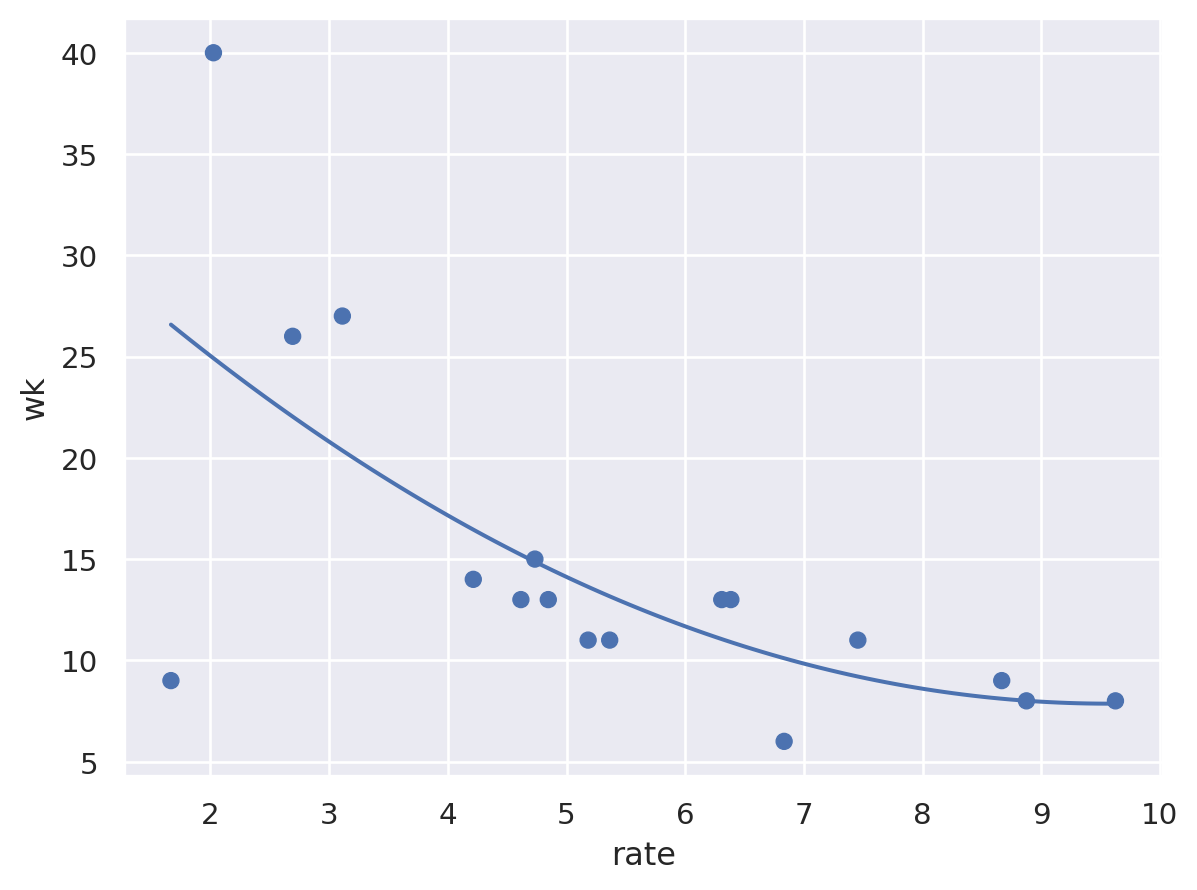

In [57]:
(
    so.Plot(data =df2,x="rate", y="wk")
    .add (so.Dot())
    .add (so.Line(),so.PolyFit(2))
)